In [1]:
# Enable import from parent folder
import sys

sys.path.insert(0, "..")

In [5]:
import jax
import jax.numpy as jnp
import equinox as eqx
import matplotlib
import matplotlib.pyplot as plt

from neuralconstitutive.nn import FullyConnectedNetwork
from neuralconstitutive.models import BernsteinNN

# Configure jax
jax.config.update("jax_enable_x64", True)  # Set default to float64 calculations

# Configure matplotlib
matplotlib.rc("axes", grid=True)
matplotlib.rc("axes.spines", right=False, top=False)
matplotlib.rc("grid", color="lightgray", linestyle="--")

### Initialize model and generate predictions
- Create the inner neural network
- Also create a Bernstein neural network that wraps the previous model

In [6]:
nn = FullyConnectedNetwork(
    ("scalar", 10, 10, "scalar"), final_activation=jax.nn.softplus
)
nn_monotone = BernsteinNN(nn, num_quadrature=100)

t = jnp.linspace(0, 10, 500)
g_nn = eqx.filter_vmap(nn)(t)
g_monotone = eqx.filter_vmap(nn_monotone)(t)

### Plot results
From the results, we see that while a vanilla neural network does not conform to a particular shape, the monotone model does indeed produce completely monotonic predictions

Text(0.5, 1.0, 'Bernstein theorem-based: $G(t;\\bf{\\theta}$)')

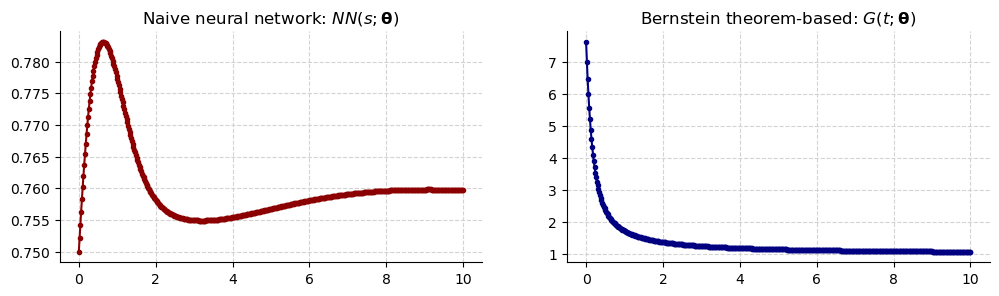

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharex=True)
axes[0].plot(t, g_nn, ".-", color="darkred", label="Normal NN")
axes[0].set_title(r"Naive neural network: $NN(s; \bf{\theta}$)")
axes[1].plot(t, g_monotone, ".-", color="navy", label="Bernstein NN")
axes[1].set_title(r"Bernstein theorem-based: $G(t;\bf{\theta}$)")